<a href="https://colab.research.google.com/github/DrumDong/Donggyu/blob/master/%EB%AA%A8%EB%91%90%EB%A5%BC%20%EC%9C%84%ED%95%9C%20%EB%94%A5%EB%9F%AC%EB%8B%9D/lab_10_NN%2CRelu%2CXavier%2CDropout%2C_and_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
tf.__version__

'1.15.0'

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
tf.set_random_seed(777)  # reproducibility

In [127]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Softmax classifier for MNIST

## input place holder

In [0]:
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,10])

## weight & bias for nn layers

In [0]:
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

## define cost/loss & optimizer

In [0]:
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,labels=Y))
train = tf.train.AdamOptimizer(learning_rate=0.1).minimize(cost)

In [0]:
# Test model
correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## initialize & train my model

In [0]:
# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 15
num_iterations = int(mnist.train.num_examples / batch_size)

Epoch: 0001, Cost: 1.098952134
Epoch: 0002, Cost: 0.964111220
Epoch: 0003, Cost: 1.008151440
Epoch: 0004, Cost: 0.998561974
Epoch: 0005, Cost: 1.052424902
Epoch: 0006, Cost: 1.032911811
Epoch: 0007, Cost: 1.008525430
Epoch: 0008, Cost: 1.072904515
Epoch: 0009, Cost: 1.020719459
Epoch: 0010, Cost: 1.035737923
Epoch: 0011, Cost: 1.058077699
Epoch: 0012, Cost: 1.025192826
Epoch: 0013, Cost: 1.005007957
Epoch: 0014, Cost: 1.002504927
Epoch: 0015, Cost: 1.069474817
Learning Finished!
Accuracy: 0.9029
Label:  [1]
Prediction:  [1]


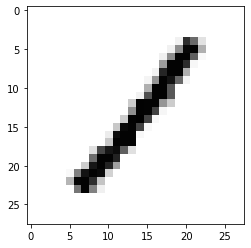

In [133]:
with tf.Session() as sess:
    # initialize
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0

        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")

    print("Learning Finished!")

    # Test model and check accuracy
    print(
        "Accuracy:",
        sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], axis=1)))
    print(
        "Prediction: ",
        sess.run(
            tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r : r + 1]}
        ),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

# NN for MNIST

In [134]:
import keras
keras.__version__

'2.2.5'

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train) # 원-핫 인코딩으로 바꿔줌
Y_test = np_utils.to_categorical(Y_test)   # 원-핫 인코딩으로 바꿔줌

In [138]:
print('X_train.shape:',X_train.shape)
print('Y_train.shape:',Y_train.shape)

X_train.shape: (60000, 784)
Y_train.shape: (60000, 10)


## 신경망 구현
- xavier 적용

In [0]:
tf.reset_default_graph()  # xavier 가중치 초기화

In [0]:
X= tf.placeholder(tf.float32,[None,784])
Y= tf.placeholder(tf.float32,[None,10])


W1 = tf.get_variable("w1", shape=[784, 392],
           initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([392]),name='bias1')
layers1 = tf.nn.relu(tf.matmul(X,W1)+b1)

W2 = tf.get_variable("w2", shape=[392, 196],
           initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([196]),name='bias2')
layers2 = tf.nn.relu(tf.matmul(layers1,W2)+b2)

W3 = tf.get_variable("w3", shape=[196, 10],
           initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]),name='bias3')
hypothesis = tf.nn.softmax(tf.matmul(layers2,W3)+b3)

# cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1)) #True, False로 나타냄.
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

## Training epoch/batch

In [141]:
training_epochs = 15
batch_size =100
total_batch = int(X_train.shape[0]/batch_size)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  #Training Cycle
  for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
      #X_train 6만개의 사진중에 랜덤으로 100개를 가져와야함. <밑바닥 딥러닝 참고>
      batch_mask = np.random.choice(X_train.shape[0], batch_size)
      batch_xs,batch_ys = X_train[batch_mask],Y_train[batch_mask]

      c,_  =sess.run([cost,optimizer],
                     feed_dict={X:batch_xs,Y:batch_ys})
      avg_cost += c/total_batch

    print('Epoch:','%04d'%(epoch+1),
              'cost = ','{:9f}'.format(avg_cost))
  #Test the model using test sets
  print('Accuracy:',accuracy.eval(session=sess,
                                  feed_dict={X:X_test,Y:Y_test}))

Epoch: 0001 cost =   0.446739
Epoch: 0002 cost =   0.199483
Epoch: 0003 cost =   0.138868
Epoch: 0004 cost =   0.109602
Epoch: 0005 cost =   0.087426
Epoch: 0006 cost =   0.072619
Epoch: 0007 cost =   0.060018
Epoch: 0008 cost =   0.051477
Epoch: 0009 cost =   0.043088
Epoch: 0010 cost =   0.040428
Epoch: 0011 cost =   0.034741
Epoch: 0012 cost =   0.029691
Epoch: 0013 cost =   0.029145
Epoch: 0014 cost =   0.023368
Epoch: 0015 cost =   0.020669
Accuracy: 0.9796


# Dropout for MNIST

In [0]:
tf.reset_default_graph() # xavier 가중치 초기화

In [0]:
X= tf.placeholder(tf.float32,[None,784])
Y= tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.get_variable("w1", shape=[784, 392],
           initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([392]),name='bias1')
layers1 = tf.nn.relu(tf.matmul(X,W1)+b1)
layers1 = tf.nn.dropout(layers1,keep_prob=keep_prob)

W2 = tf.get_variable("w2", shape=[392, 196],
           initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([196]),name='bias2')
layers2 = tf.nn.relu(tf.matmul(layers1,W2)+b2)
layers2 = tf.nn.dropout(layers2,keep_prob=keep_prob)

W3 = tf.get_variable("w3", shape=[196, 10],
           initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]),name='bias3')
hypothesis = tf.nn.softmax(tf.matmul(layers2,W3)+b3)

# cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1)) #True, False로 나타냄.
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

In [144]:
training_epochs = 15
batch_size =100
total_batch = int(X_train.shape[0]/batch_size)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  #Training Cycle
  for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
      #X_train 6만개의 사진중에 랜덤으로 100개를 가져와야함. <밑바닥 딥러닝 참고>
      batch_mask = np.random.choice(X_train.shape[0], batch_size)
      batch_xs,batch_ys = X_train[batch_mask],Y_train[batch_mask]

      c,_  =sess.run([cost,optimizer],
                     feed_dict={X:batch_xs,Y:batch_ys,keep_prob:0.7})
      avg_cost += c/total_batch

    print('Epoch:','%04d'%(epoch+1),
              'cost = ','{:9f}'.format(avg_cost))
  #Test the model using test sets
  print('Accuracy:',accuracy.eval(session=sess,
                                  feed_dict={X:X_test,Y:Y_test,keep_prob:1}))

Epoch: 0001 cost =   0.569160
Epoch: 0002 cost =   0.272312
Epoch: 0003 cost =   0.207728
Epoch: 0004 cost =   0.174506
Epoch: 0005 cost =   0.152259
Epoch: 0006 cost =   0.134241
Epoch: 0007 cost =   0.123430
Epoch: 0008 cost =   0.110345
Epoch: 0009 cost =   0.103189
Epoch: 0010 cost =   0.093933
Epoch: 0011 cost =   0.090315
Epoch: 0012 cost =   0.080427
Epoch: 0013 cost =   0.079173
Epoch: 0014 cost =   0.075525
Epoch: 0015 cost =   0.074058
Accuracy: 0.9791
